# Introduction 

## Goal.
The goal of this lab is to familiarize yourself with some advanced forms of evolutionary computation (EC). In particular, you will explore the use of multi-objective evolutionary algorithms to find the optimal trade-off solutions of problems with multiple objectives.

Note once again that, unless otherwise specified, in this module's exercises we will use real-valued genotypes and that the aim of the algorithms will be to *minimize* all fitness functions $f_i(\mathbf{x})$, i.e. lower values correspond to a better fitness!

## Exercise 1

In this first exercise, you will explore the optimization of multiple objectives. Before you begin using multi-objective evolutionary algorithms you will first experiment with turning multi-objective problems into single-objective problems so that you may employ a standard Genetic Algorithm (such as was used earlier in the course). One way that multiple objectives may be combined into a single-objective is by combining the objectives in a weighted sum.

By default, this exercise will try to optimize the 2-objective __[Kursawe benchmark problem](http://pythonhosted.org/inspyred/reference.html\#inspyred.benchmarks.Kursawe)__: 

\begin{split}
f_1(x) &= \sum_{i=1}^{n-1} \left[-10e^{-0.2\sqrt{x_i^2 + x_{i+1}^2}}\right] \\
f_2(x) &= \sum_{i=1}^n \left[|x_i|^{0.8} + 5\sin(x_i)^3\right]
\end{split}


where, $n$ represents the number of dimensions and $x_i \in [-5, 5]$ for $i=1,\dots,n$.

You will use a GA by additively combining the two objectives with equal weights. Please note that the Kursawe benchmark problem is scalable in the number of variables (although it's normally tested with 3 variables, e.g. the 2-D Pareto Front you'll see on the *inpsyred* web-page refers to a 3-variables version of this problem), therefore you should set the number of variables to 2 or more (see the comments in the script).

You will first see this combined fitness function plotted over evolutionary time (best and mean), and then (if you set the number of variables equal to 2) you will see the initial and final populations (left and right, respectively) plotted on top of heatmaps depicting objective 1 (top) and objective 2 (bottom):
- What happens when you run the GA with this fitness function?

Quando si esegue il GA con una funzione di fitness combinata, l'algoritmo cerca di ottimizzare simultaneamente i due obiettivi della funzione di benchmark di Kursawe. Poiché gli obiettivi sono combinati in modo additivo o moltiplicativo, l'algoritmo seleziona le soluzioni in base a questo nuovo valore di fitness unificato.
. Se l'approccio usato è additivo, la fitness è semplicemente la somma pesata dei due obiettivi, e quindi il GA cerca una soluzione che bilanci i due obiettivi in modo uniforme (se i pesi sono uguali).
. Se l'approccio è moltiplicativo, la fitness è il prodotto dei due obiettivi pesati. Questo tende a penalizzare maggiormente soluzioni con uno degli obiettivi molto basso, poiché qualsiasi valore vicino a zero nel prodotto influenzerà molto di più la fitness finale rispetto a una somma.
Durante l'addestramento, vediamo il miglioramento progressivo del valore di fitness (sia il migliore che il medio) nel corso delle generazioni.

- Why do you obtain this result? (Hint: pay attention to the relative scaling of the two objectives!)

Il risultato dipende fortemente dalla scalatura relativa dei due obiettivi e dal metodo con cui vengono combinati. Nella combinazione additiva, se uno degli obiettivi ha un valore numericamente molto più grande dell'altro, esso dominerà il contributo alla fitness. In altre parole, l'algoritmo tenderà a migliorare principalmente l'obiettivo con valori più grandi. 
Nella combinazione moltiplicativa, invece, se uno dei due obiettivi assume valori molto piccoli (vicini a zero), influenzerà pesantemente il prodotto totale, e quindi l'algoritmo sarà costretto a bilanciare meglio entrambi gli obiettivi. 

Try altering the fitness weights to give the first objective greater importance.

-  What happens if you give the first (or second) objective all of the weight?

 Quando dai maggiore importanza al primo obiettivo, l'algoritmo tende a concentrarsi su di esso, portando a una fitness di -13.99. Il primo obiettivo arriva a -19.99, mentre il secondo viene trascurato, con un valore molto basso di 0.0165. Questo indica che il primo obiettivo è stato fortemente ottimizzato a scapito del secondo.
  Con la combinazione moltiplicativa, dare più peso al primo obiettivo produce una fitness di -52.40. Il primo obiettivo raggiunge un valore di -13.09, ma il secondo obiettivo è meno ottimizzato, con un valore positivo di 19.05. La moltiplicazione crea quindi uno squilibrio simile, dove il secondo obiettivo non viene ottimizzato allo stesso modo.

- Can you find a weighting able to find a solution that approaches the optimum on both objectives? 

La combinazione additiva di base con pesi uguali ([0.5, 0.5]) produce una fitness di -11.96, con il primo obiettivo a -13.36 e il secondo a -10.56. Questo risulta in una soluzione ben bilanciata che non privilegia un obiettivo rispetto all'altro.
Con la combinazione moltiplicativa con pesi uguali ([0.5, 0.5]), la fitness migliore è -62.39, ma i valori degli obiettivi (-13.12 e 19.01) mostrano che non sono bilanciati, e il secondo obiettivo non viene ottimizzato.
Per avvicinarsi a un optimum su entrambi gli obiettivi, la combinazione additiva con pesi uguali ([0.5, 0.5]) sembra funzionare meglio, poiché fornisce un buon equilibrio, ottimizzando entrambi gli obiettivi senza sacrificare significativamente uno dei due.


Try this out on a different problem (e.g. the __[DTLZ7 benchmark](http://pythonhosted.org/inspyred/reference.html\#inspyred.benchmarks.DTLZ7)__, you can change the problem by changing the parameter *problem* in the script) and/or try increasing the dimensionality of the Kursawe problem (change the variable `num_vars` in the script). Please note that the DTLZ7 benchmark problem is scalable in the number of variables and objectives (although it's normally tested with a number of variables equal to the number of objectives + 19, and a number of objectives equal to 3, e.g. the 3-D Pareto Front you'll see on the *inpsyred* web-page refers to a 22-variables and 3-objectives version of this problem), therefore you should set those parameters accordingly (see the comments in the script).
The objective functions are the following:


\begin{split}
f_1(\vec{x}) &= x_1 \\
f_i(\vec{x}) &= x_i \\
f_m(\vec{x}) &= (1 + g(\vec{x_m}))h(f_1, f_2, \dots, f_{m-1}, g) \\
g(\vec{x_m}) &= 1 + \frac{9}{|\vec{x_m}|}\sum_{x_i \in \vec{x_m}}x_i \\
h(f_1, f_2, \dots, f_{m-1}, g) &= m - \sum_{i=1}^{m-1}\left[\frac{f_1}{1+g}(1 + \sin(3\pi f_i))\right]
\end{split}

where, $n$ represents the number of dimensions, $m$ represents the number of objectives, $x_i \in [0, 1]$ for $i=1,\dots,n$, and $\vec{x_m} = x_m x_{m+1} \dots x_{n}$.


- Does your weighting still work on the new problem? (NOTE: The size of the array `args["fitness_weights"]` must be the same as the number of objectives.)

Quando si modificano i pesi (ad esempio, favorendo il primo o il secondo obiettivo), l'algoritmo tende a concentrarsi fortemente su un obiettivo a scapito dell'altro, come accadeva con il problema di Kursawe.
Il probelma della moltiplicazione è che ocn pesi sbilancati si concentra solo su una e una volta che una delle due viene butatta a zero allorea anche la fitness finale è zero 

- Can you think of a method for combining the objectives that might work better than using a weighted sum? (NOTE: If you want to try your idea out, edit the `init` method of `CombinedObjectives`).

Metodo Tchebycheff scalarization
Il metodo Tchebycheff è una tecnica alternativa per combinare gli obiettivi. Invece di sommare gli obiettivi con pesi diversi, cerca di minimizzare la distanza massima di ciascun obiettivo da un punto di riferimento (solitamente l'obiettivo ideale). In altre parole, bilancia l'ottimizzazione concentrandosi sull'obiettivo più "critico", evitando che uno degli obiettivi peggiori troppo rispetto agli altri.
come si può notare dal risultati questo metodo non tende a minimizzare al massimo uno dei due obbiettivi ma mantiene un biklanciamento anche nel caso in cui uno dei due obbiettivi è più importante dell'altro evitando di concentrarsi solo su uno come succedeva negli altri metodi 



run1 [[0.5, 0.5], 'additive']
Best Individual [-1.4578829748910167, -1.3901243825586973, -1.4434172134474197]
Best Fitness -11.965681455745058
valori delle singole fitness: [[-13.381781838839292, -10.549581072650824]]


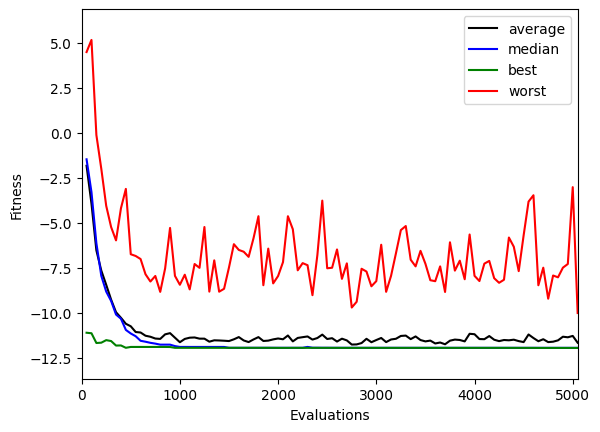

run2 [[0.5, 0.5], 'multiplicative']
Best Individual [1.5307616604908976, 1.4188424110571318, 1.5311357067222646]
Best Fitness -62.38094686855875
valori delle singole fitness: [[-13.17429597079945, 18.94019900777235]]


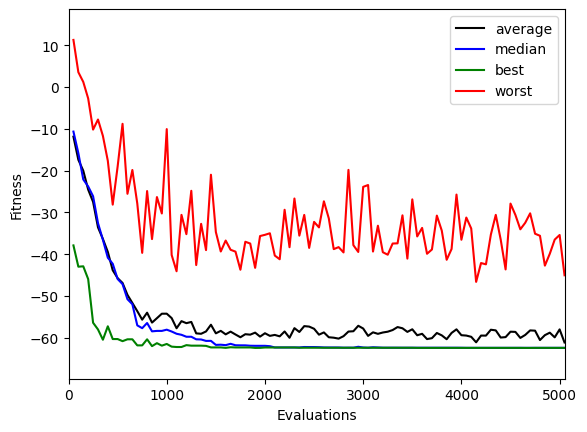

run3 [[0.5, 0.5], 'tchebycheff']
Best Individual [5.0, 5.0, 5.0]
Best Fitness 2.4311673443421418
valori delle singole fitness: [[-4.8623346886842835, -2.3547825353840617]]


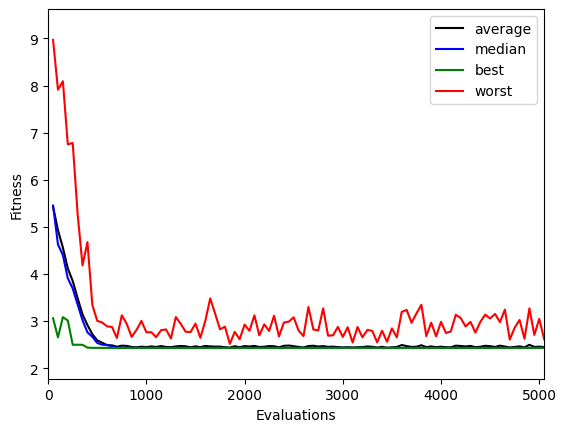

run4 [[0.7, 0.3], 'additive']
Best Individual [-0.0182492144200308, 0.00994577121956855, 0.020361222922861914]
Best Fitness -13.90629992427755
valori delle singole fitness: [[-19.913300918180575, 0.11003572816283888]]


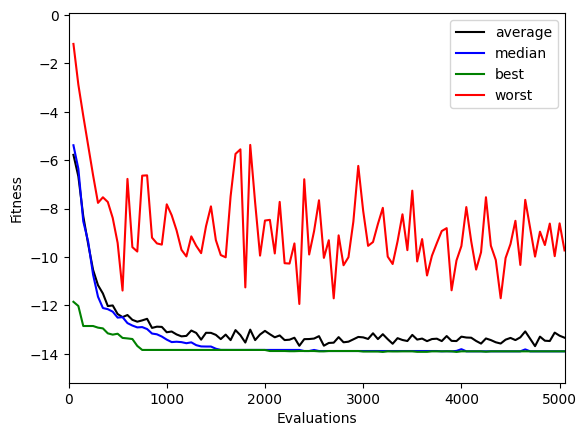

run5 [[0.7, 0.3], 'multiplicative']
Best Individual [1.5306563412541037, 1.4668528268631633, 1.5171913173010712]
Best Fitness -52.40017138617233
valori delle singole fitness: [[-13.101084621264, 19.046104415159895]]


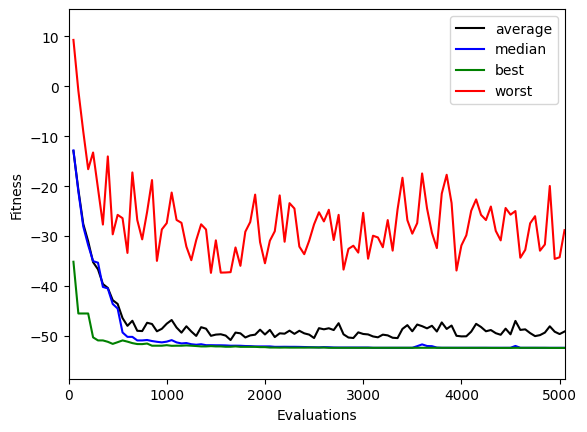

run6 [[0.7, 0.3], 'tchebycheff']
Best Individual [5.0, 5.0, -5.0]
Best Fitness 3.403634282078998
valori delle singole fitness: [[-4.8623346886842835, 6.462869124982268]]


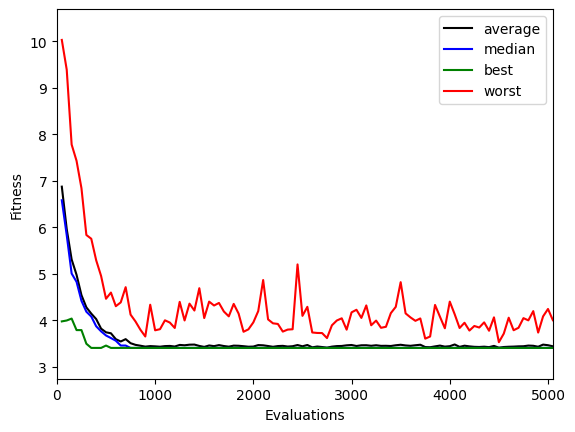

run7 [[0.3, 0.7], 'additive']
Best Individual [-1.5059091990628004, -1.4651609984420348, -1.5004201217082584]
Best Fitness -11.446938271902175
valori delle singole fitness: [[-13.143313257178239, -10.719920421069578]]


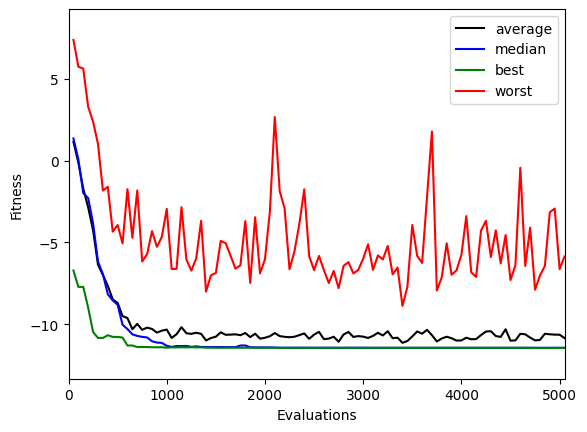

run8 [[0.3, 0.7], 'multiplicative']
Best Individual [1.5539267483396322, 1.4472746734919606, 1.501222361414256]
Best Fitness -52.38471061929154
valori delle singole fitness: [[-13.129525233026168, 18.99924014933421]]


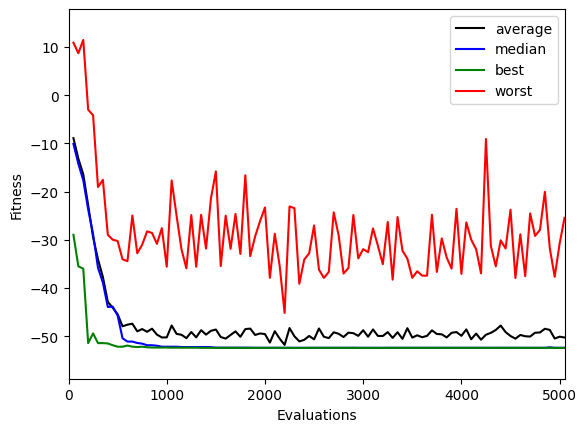

run9 [[0.3, 0.7], 'tchebycheff']
Best Individual [4.2844391394212185, 5.0, 5.0]
Best Fitness 1.5332348178562731
valori delle singole fitness: [[-5.110782726187577, -2.1327637949127762]]


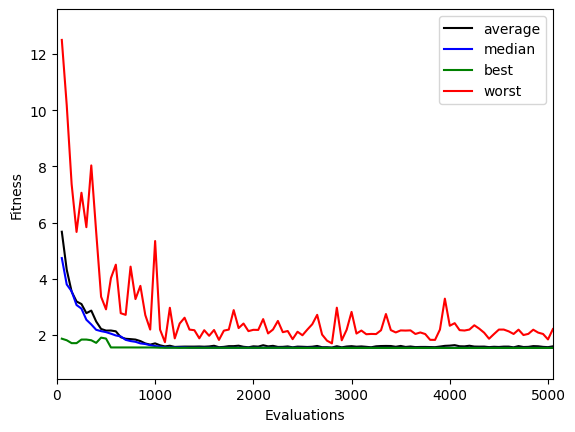

run10 [[0.6, 0.4], 'additive']
Best Individual [-1.3969366661331954, -1.3150826241067226, -1.4181471965245032]
Best Fitness -12.266786496249727
valori delle singole fitness: [[-13.60546481600564, -10.25876901661586]]


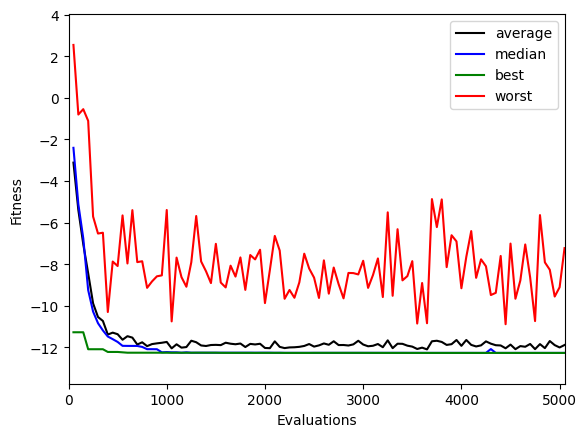

run11 [[0.6, 0.4], 'multiplicative']
Best Individual [1.52738172881038, 1.4392392080577485, 1.5206119382813665]
Best Fitness -59.90009180363146
valori delle singole fitness: [[-13.150974815664206, 18.978343381144928]]


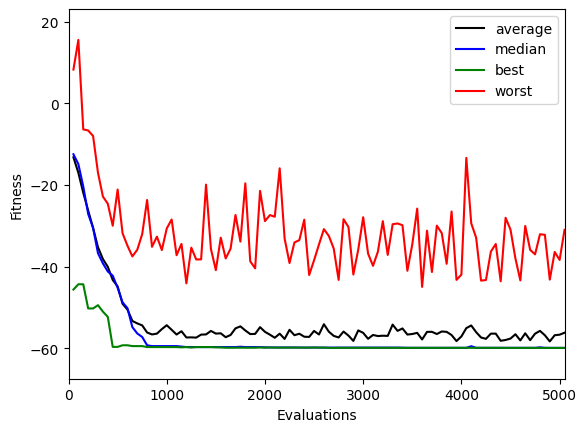

run12 [[0.6, 0.4], 'tchebycheff']
Best Individual [5.0, 5.0, 5.0]
Best Fitness 2.91740081321057
valori delle singole fitness: [[-4.8623346886842835, -2.3547825353840617]]


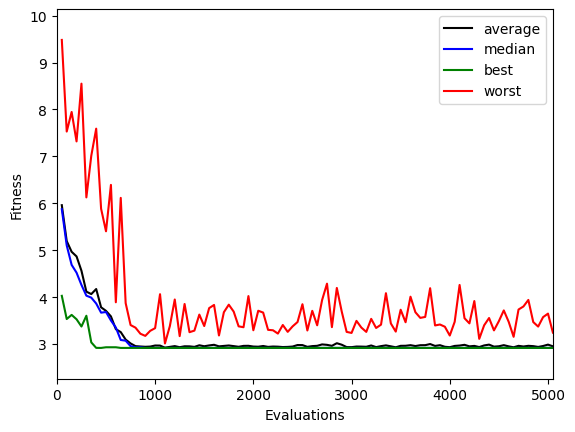

run13 [[0.4, 0.6], 'additive']
Best Individual [-1.4777903256666594, -1.4372568154698564, -1.4764055359974935]
Best Fitness -11.69805491145849
valori delle singole fitness: [[-13.243962064738232, -10.667450142605329]]


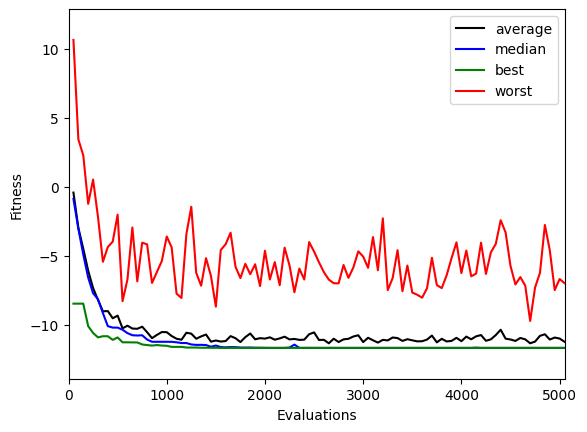

run14 [[0.4, 0.6], 'multiplicative']
Best Individual [1.526256219150558, 1.438003259771604, 1.520546121580716]
Best Fitness -59.89970818577476
valori delle singole fitness: [[-13.154346659529548, 18.9733571647909]]


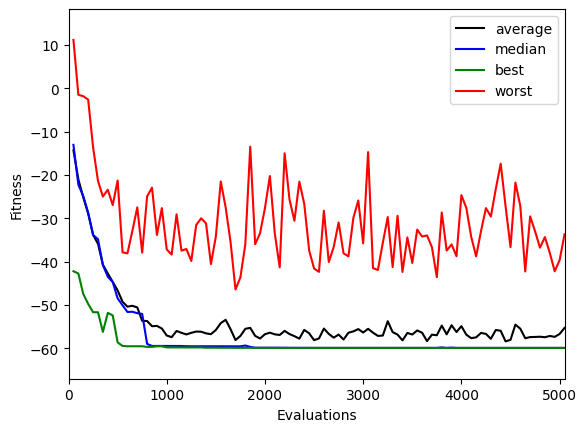

run15 [[0.4, 0.6], 'tchebycheff']
Best Individual [5.0, 5.0, 5.0]
Best Fitness 1.9449338754737135
valori delle singole fitness: [[-4.8623346886842835, -2.3547825353840617]]


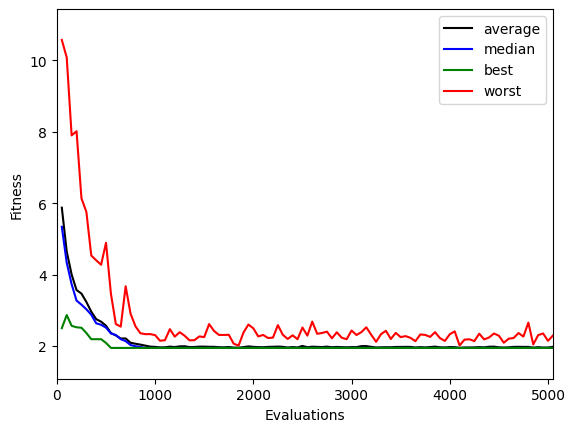

In [1]:
import sys
from pylab import *

from inspyred import benchmarks
from inspyred.ec import Bounder
from inspyred.ec.emo import Pareto

from utils.utils_04 import multi_objective
from utils.utils_04.inspyred_utils import *
from utils.utils_04.inspyred_utils import NumpyRandomWrapper

class CombinedObjectives(Pareto):
    def __init__(self, pareto, args):
        """ edit this function to change the way that multiple objectives
        are combined into a single objective
        
        """
        
        Pareto.__init__(self, pareto.values)
        if "fitness_weights" in args :
            weights = asarray(args["fitness_weights"])
        else : 
            weights = asarray([1 for _ in pareto.values])
        
        # Metodo Additivo
        if args['mode'] == 'additive':
            self.fitness = sum(asarray(pareto.values) * weights)
        
        # Metodo Moltiplicativo
        elif args['mode'] == 'multiplicative':
            self.fitness = np.prod(asarray(pareto.values) * weights)
        
        # Metodo Tchebycheff
        elif args['mode'] == 'tchebycheff':
            self.fitness = max(weights * abs(asarray(pareto.values)))
    def __lt__(self, other):
        return self.fitness < other.fitness

"""
-------------------------------------------------------------------------
Edit this part to do the exercises

Try different methods of combining multiple objectives into a single objective
    (1) additive
    (2) multiplicative

Try using different weights for combining the objectives in both cases, and try
this on different fitness functions.

"""
import matplotlib.pyplot as plt
#weights, mode
runs = {
    'run1' : [[0.5, 0.5], 'additive'],
    'run2' : [[0.5, 0.5], 'multiplicative'],
    'run3' : [[0.5, 0.5], 'tchebycheff'],
    'run4' : [[0.7, 0.3], 'additive'],
    'run5' : [[0.7, 0.3], 'multiplicative'],
    'run6' : [[0.7, 0.3], 'tchebycheff'],
    'run7' : [[0.3, 0.7], 'additive'],
    'run8' : [[0.3, 0.7], 'multiplicative'], 
    'run9' : [[0.3, 0.7], 'tchebycheff'],  
    'run10' : [[0.6, 0.4], 'additive'],
    'run11' : [[0.6, 0.4], 'multiplicative'],
    'run12' : [[0.6, 0.4], 'tchebycheff'],
    'run13' : [[0.4, 0.6], 'additive'],
    'run14' : [[0.4, 0.6], 'multiplicative'], 
    'run15' : [[0.4, 0.6], 'tchebycheff']
}


display = True # Plot initial and final populations
num_vars = 3 # set 3 for Kursawe, set to 19+num_objs for DTLZ7
num_objs = 2 # used only for DTLZ7


for r in runs:
    print(r, runs[r])
    # parameters for the GA
    args = {}
    args["pop_size"] = 50
    args["max_generations"] = 100
    args['mode'] = runs[r][1]

    # make sure that this array has the same size as num_objs
    args["fitness_weights"] = runs[r][0]

    problem = benchmarks.Kursawe(num_vars) # set num_vars = 3

    """
    -------------------------------------------------------------------------
    """

    args["fig_title"] = 'GA'

    seed = None
    rng = NumpyRandomWrapper(seed)

    best_individual, best_fitness = multi_objective.run_ga(rng, problem, CombinedObjectives, 
                                        display=display, num_vars=num_vars, 
                                        **args)

    print("Best Individual", best_individual)
    print("Best Fitness", best_fitness)
    print('valori delle singole fitness:',problem.evaluator([best_individual], args))

    if display:    
        plt.show()

run1 [[0.5, 0.5], 'additive']
Best Individual [0.8353276302320537, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.014440230652529418, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Best Fitness 1.5889080631228447
valori delle singole fitness: [[0.8353276302320537, 2.342488496013636]]


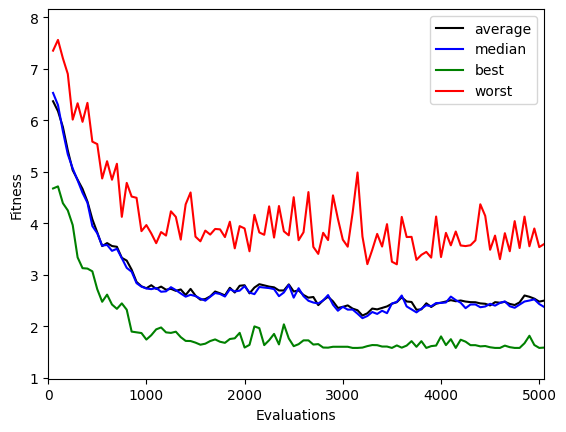

run2 [[0.5, 0.5], 'multiplicative']
Best Individual [0.0, 0.0, 0.27564799979775334, 0.0, 0.039172168844764044, 0.0, 1.0, 0.0, 0.0, 0.5089424402467733, 0.45937776003529174, 1.0, 0.2889559516797207, 0.0, 0.0, 0.0, 0.08544166137067899, 1.0, 0.16943279540372191, 0.0, 1.0]
Best Fitness 0.0
valori delle singole fitness: [[0.0, 9.244273699640836]]


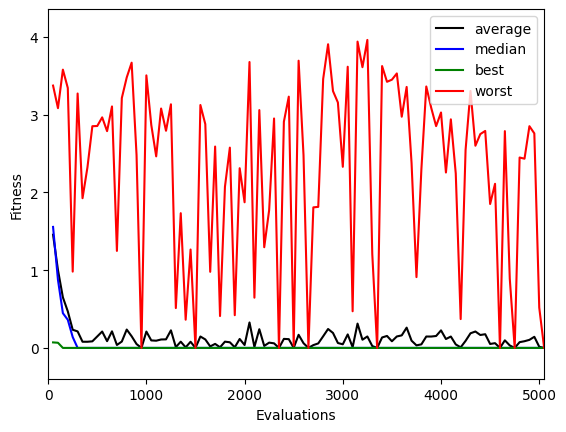

run3 [[0.5, 0.5], 'tchebycheff']
Best Individual [0.8758928752605114, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Best Fitness 1.1588684576980675
valori delle singole fitness: [[0.8758928752605114, 2.317736915396135]]


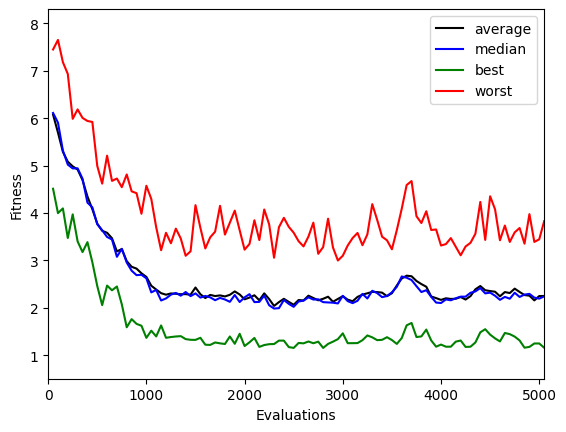

run4 [[0.7, 0.3], 'additive']
Best Individual [0.16139950854790994, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08710978088216828, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05761645972976313, 0.0, 0.02607336339889149, 0.0]
Best Fitness 1.2623154923991038
valori delle singole fitness: [[0.16139950854790994, 3.831119454718556]]


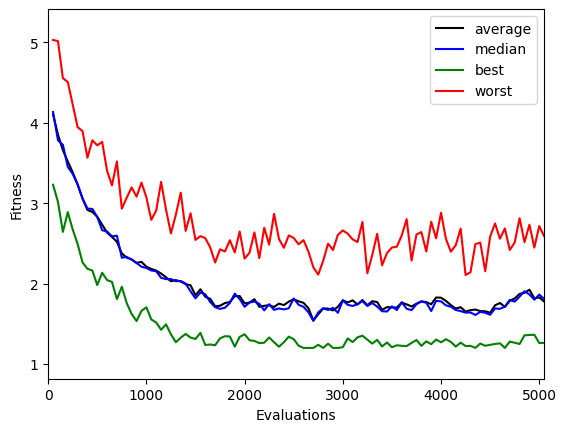

run5 [[0.7, 0.3], 'multiplicative']
Best Individual [0.0, 1.0, 1.0, 0.29392955901502366, 0.0, 0.42953261273853305, 0.4013445258459396, 0.24253348409471975, 0.12982111007376765, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.9650849644436461, 0.41852449908350453, 1.0, 0.0, 1.0, 0.0]
Best Fitness 0.0
valori delle singole fitness: [[0.0, 13.792693679765621]]


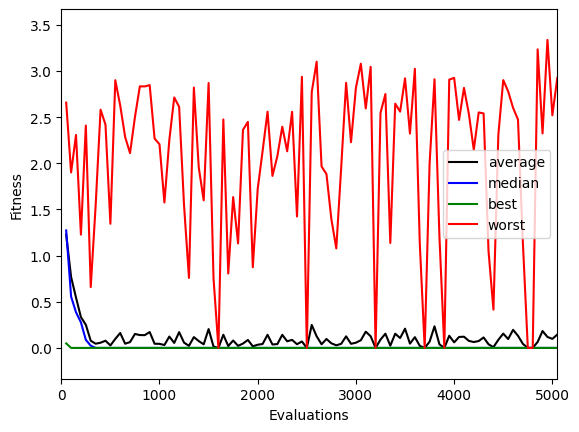

run6 [[0.7, 0.3], 'tchebycheff']
Best Individual [0.8203358453398384, 0.000680411806826106, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12649428780162364, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Best Fitness 0.7439798314838075
valori delle singole fitness: [[0.8203358453398384, 2.4799327716126918]]


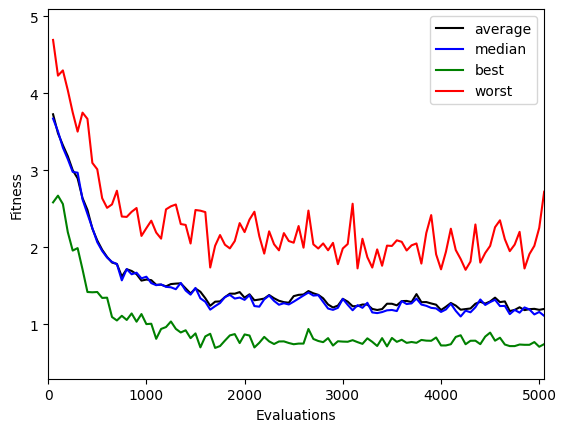

run7 [[0.3, 0.7], 'additive']
Best Individual [0.8060182917480572, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Best Fitness 1.9319732893111967
valori delle singole fitness: [[0.8060182917480572, 2.414525431123971]]


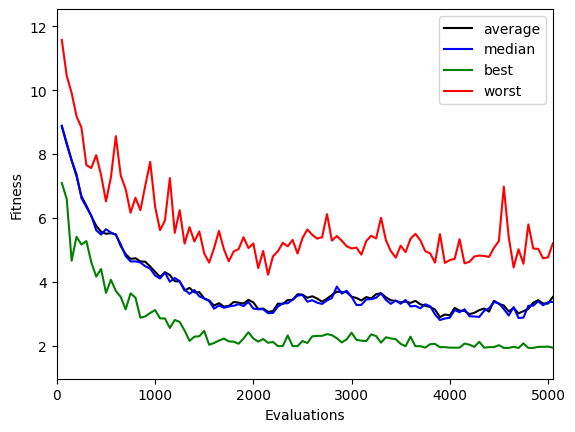

run8 [[0.3, 0.7], 'multiplicative']
Best Individual [0.0, 1.0, 0.9750004250289488, 1.0, 0.4212824652756565, 0.0, 0.0, 0.0, 1.0, 0.6128448519828066, 0.0, 0.0, 0.9229371367747667, 0.0, 1.0, 0.0, 0.0, 0.5616254361289358, 0.5528845460645468, 0.4976072585836211, 1.0]
Best Fitness 0.0
valori delle singole fitness: [[0.0, 12.589763907855353]]


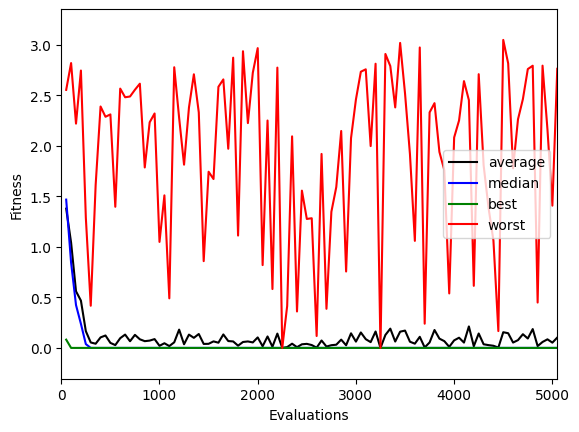

run9 [[0.3, 0.7], 'tchebycheff']
Best Individual [0.7998372150311638, 0.024776437436926382, 0.0, 0.14025146120407095, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.028347802794289095, 0.0, 0.0, 0.11230374199372944, 0.0, 0.0, 0.10306950456855703, 0.05847239531303146, 0.0, 0.0]
Best Fitness 2.002246186263986
valori delle singole fitness: [[0.7998372150311638, 2.860351694662837]]


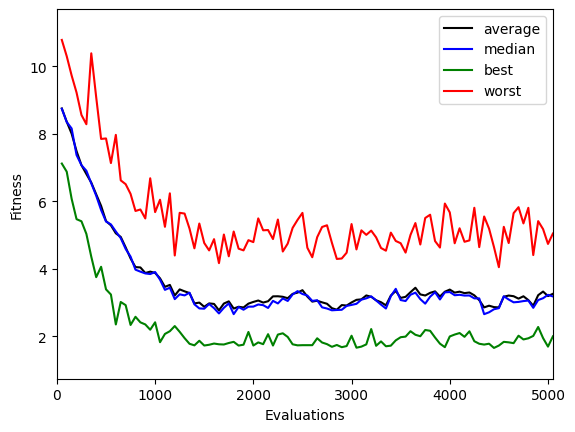

run10 [[0.6, 0.4], 'additive']
Best Individual [0.848043061244717, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012689881695785417, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Best Fitness 1.438214390958639
valori delle singole fitness: [[0.848043061244717, 2.3234713855295217]]


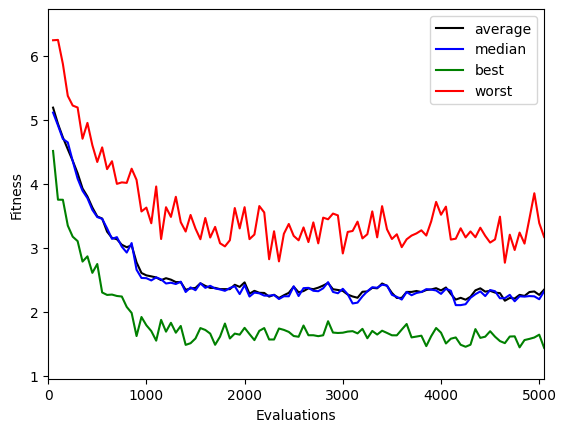

run11 [[0.6, 0.4], 'multiplicative']
Best Individual [0.0, 1.0, 0.0, 0.16336710634697083, 0.0, 1.0, 1.0, 0.0, 0.4117933136353052, 0.05213744074562754, 1.0, 0.8988415596127741, 0.46874219585233085, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.6109602057058002, 0.40909785589740655]
Best Fitness 0.0
valori delle singole fitness: [[0.0, 13.013445710016594]]


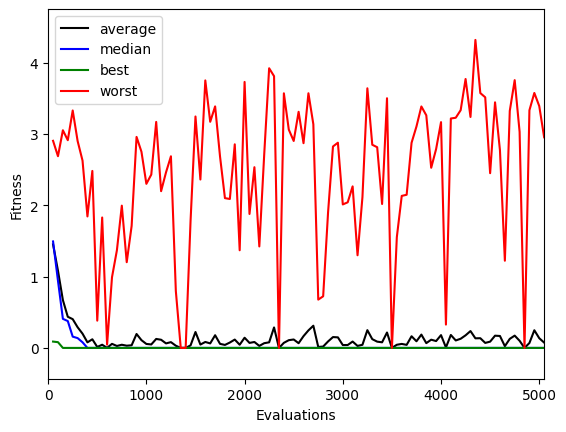

run12 [[0.6, 0.4], 'tchebycheff']
Best Individual [0.8865012455597963, 0.0, 0.0, 0.0, 0.09514626598772477, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02210023642744781, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05903688644618784, 0.0, 0.0]
Best Fitness 0.9978567802969203
valori delle singole fitness: [[0.8865012455597963, 2.4946419507423006]]


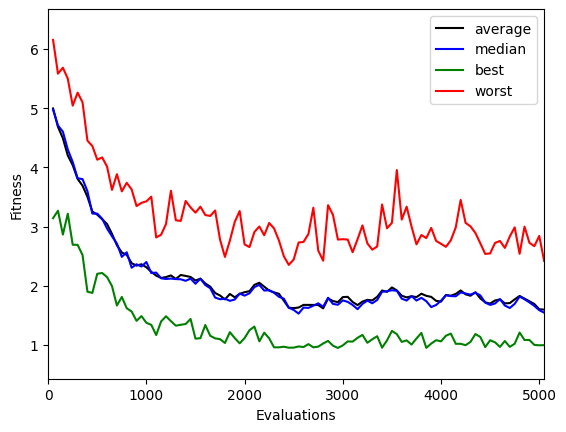

run13 [[0.4, 0.6], 'additive']
Best Individual [0.8888814612831204, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08188350650267501, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5311383274889161, 0.0, 0.0, 0.0, 0.0]
Best Fitness 2.0913604759226465
valori delle singole fitness: [[0.8888814612831204, 2.8930131523489973]]


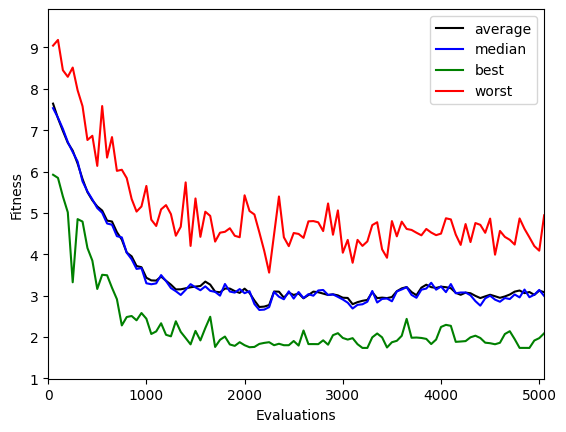

run14 [[0.4, 0.6], 'multiplicative']
Best Individual [0.0, 0.0, 0.0, 0.5493959684531965, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.12221805206893299, 1.0, 0.0, 0.0, 0.2635121146173414, 0.4395022272851732, 0.8032263164471986, 1.0, 0.0]
Best Fitness 0.0
valori delle singole fitness: [[0.0, 11.360069210984658]]


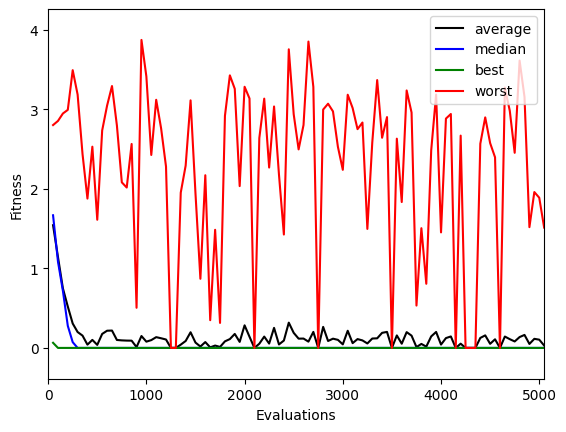

run15 [[0.4, 0.6], 'tchebycheff']
Best Individual [0.8589265655064123, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05097357420921915, 0.08788468158422802, 0.0, 0.0, 0.0, 0.11453679240866156, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Best Fitness 1.521041250809825
valori delle singole fitness: [[0.8589265655064123, 2.5350687513497085]]


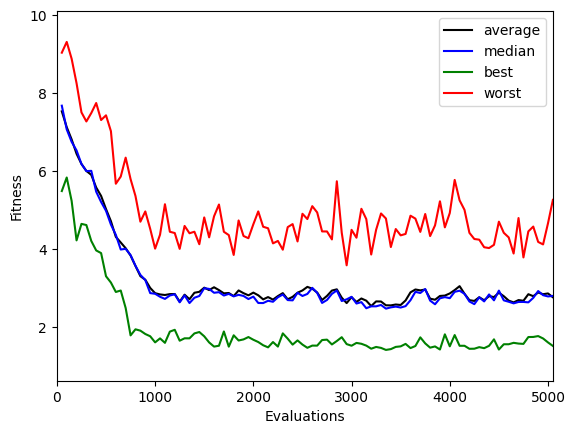

In [5]:
import sys
from pylab import *

from inspyred import benchmarks
from inspyred.ec import Bounder
from inspyred.ec.emo import Pareto

from utils.utils_04 import multi_objective
from utils.utils_04.inspyred_utils import *
from utils.utils_04.inspyred_utils import NumpyRandomWrapper

class CombinedObjectives(Pareto):
    def __init__(self, pareto, args):
        """ edit this function to change the way that multiple objectives
        are combined into a single objective
        
        """
        
        Pareto.__init__(self, pareto.values)
        if "fitness_weights" in args :
            weights = asarray(args["fitness_weights"])
        else : 
            weights = asarray([1 for _ in pareto.values])
        
        # Metodo Additivo
        if args['mode'] == 'additive':
            self.fitness = sum(asarray(pareto.values) * weights)
        
        # Metodo Moltiplicativo
        elif args['mode'] == 'multiplicative':
            self.fitness = np.prod(asarray(pareto.values) * weights)
        
        # Metodo Tchebycheff
        elif args['mode'] == 'tchebycheff':
            self.fitness = max(weights * abs(asarray(pareto.values)))

    def __lt__(self, other):
        return self.fitness < other.fitness

"""
-------------------------------------------------------------------------
Edit this part to do the exercises

Try different methods of combining multiple objectives into a single objective
    (1) additive
    (2) multiplicative

Try using different weights for combining the objectives in both cases, and try
this on different fitness functions.

"""
import matplotlib.pyplot as plt
#weights, mode
runs = {
    'run1' : [[0.5, 0.5], 'additive'],
    'run2' : [[0.5, 0.5], 'multiplicative'],
    'run3' : [[0.5, 0.5], 'tchebycheff'],
    'run4' : [[0.7, 0.3], 'additive'],
    'run5' : [[0.7, 0.3], 'multiplicative'],
    'run6' : [[0.7, 0.3], 'tchebycheff'],
    'run7' : [[0.3, 0.7], 'additive'],
    'run8' : [[0.3, 0.7], 'multiplicative'], 
    'run9' : [[0.3, 0.7], 'tchebycheff'],  
    'run10' : [[0.6, 0.4], 'additive'],
    'run11' : [[0.6, 0.4], 'multiplicative'],
    'run12' : [[0.6, 0.4], 'tchebycheff'],
    'run13' : [[0.4, 0.6], 'additive'],
    'run14' : [[0.4, 0.6], 'multiplicative'], 
    'run15' : [[0.4, 0.6], 'tchebycheff']
}


display = True # Plot initial and final populations
num_objs = 2 # used only for DTLZ7
num_vars = 19 + num_objs # set 3 for Kursawe, set to 19+num_objs for DTLZ7


for r in runs:
    print(r, runs[r])
    # parameters for the GA
    args = {}
    args["pop_size"] = 50
    args["max_generations"] = 100
    args['mode'] = runs[r][1]

    # make sure that this array has the same size as num_objs
    args["fitness_weights"] = runs[r][0]

    problem = benchmarks.DTLZ7(num_vars, num_objs) # set num_vars = 3

    """
    -------------------------------------------------------------------------
    """

    args["fig_title"] = 'GA'

    seed = None
    rng = NumpyRandomWrapper(seed)

    best_individual, best_fitness = multi_objective.run_ga(rng, problem, CombinedObjectives, 
                                        display=display, num_vars=num_vars, 
                                        **args)

    print("Best Individual", best_individual)
    print("Best Fitness", best_fitness)
    print('valori delle singole fitness:',problem.evaluator([best_individual], args))

    if display:    
        plt.show()


## Exercise 2

In this exercise you will use the Non-dominated Sorting Genetic Algorithm-II (NSGA2)$^{[1]}$ to evolve not just a single optimum but to find the **Pareto-set** of non-dominated solutions.
Recall that one solution Pareto-dominates another if it is no-worse on all objectives and it is better on at least one-objective.

This will again try to optimize the 2-objective Kursawe benchmark problem, but now using the multi-objective algorithm.

- How do the solutions you find here compare to those found in exercise 1?

Nell'esercizio 1, abbiamo combinato gli obiettivi in una singola funzione di fitness, cercando di trovare una singola soluzione ottimale. Di conseguenza, l'algoritmo genetico ha prodotto una singola soluzione che rappresenta un compromesso tra i due obiettivi. Tuttavia, l'approccio può sbilanciare l'ottimizzazione a seconda di come vengono combinati gli obiettivi (additivo o moltiplicativo).
In Exercise 2, utilizzando il NSGA-II (Non-dominated Sorting Genetic Algorithm-II), abbiamo trovato un Pareto-set di soluzioni non dominate. Ciò significa che nessuna di queste soluzioni è chiaramente migliore in tutte le dimensioni, ma ognuna rappresenta un compromesso tra i due obiettivi. Questo approccio è più efficace per problemi multi-obiettivo, in quanto fornisce una gamma di soluzioni bilanciate tra gli obiettivi, anziché una singola soluzione ottimale.
Nel seocndo esericio otteniamo un insieme di soluzioni, ciascuna con una combinazione diversa di fitness tra i due obiettivi. Questo set Pareto di soluzioni rappresenta tutte le opzioni ottimali possibili, in cui migliorare un obiettivo porta inevitabilmente a un peggioramento dell'altro. Ogni soluzione trovata non è dominata dalle altre, il che significa che non esiste una soluzione che sia migliore in entrambi gli obiettivi.

In Exercise 1, abbiamo ottenuto una singola soluzione compromesso combinando gli obiettivi in una singola funzione di fitness.
In Exercise 2, con NSGA-II, otteniamo un set Pareto di soluzioni non dominate, che ci permette di visualizzare i compromessi tra gli obiettivi.

- Is there a single solution that is clearly the best?

No, non esiste una singola soluzione che è chiaramente la migliore. Questo è tipico dei problemi multi-obiettivo: una soluzione potrebbe essere migliore per uno degli obiettivi, ma peggiore per l'altro. L'idea di NSGA-II è proprio quella di fornire un insieme di soluzioni ottimali non dominate, senza dover scegliere a priori quale obiettivo privilegiare.

Now, try the more difficult DTLZ7 problem (or, alternatively, one of the other benchmark problems available in `inspyred` (see [link](https://pythonhosted.org/inspyred/reference.html\#multi-objective-benchmarks) for a list of multi-objective benchmark problems).

- Can you still find good solutions?

Quando si risolve DTLZ7, NSGA-II gestisce in modo efficiente i molteplici obiettivi, ma:
La complessità del fronte di Pareto aumenta con il numero di obiettivi, rendendo più difficile convergere verso l'insieme ottimale di soluzioni.
Potresti notare lacune nel fronte di Pareto se la popolazione o il numero di generazioni è troppo piccolo.

- What happens if you increase the population size (change the variable `args[pop_size]` in the script) or the number of generations (see the parameter `args[max_generations]`?

Finally, it may aid your intuition to try building up new problems out of single-objective benchmark problems. This may be done by creating a `MyBenchmark` instance with a list of single-objective benchmarks (see [link](https://pythonhosted.org/inspyred/reference.html\#single-objective-benchmarks) for a list of single-objective benchmark problems). You can add as many objectives as you like, but the Pareto-front won't be plotted with more than two objectives.

---

[1]:
Deb, K., Pratap, A., and Agarwal, S. A fast and elitist multi-objective genetic algorithm: NSGA2. IEEE Transactions on Evolutionary Computation 6.2 (2002): 149172


---------------------------------------------------------------------------------------


Kursawe basic [3, 0, 'Kursawe', 50, 100]
num_vars 3
num_objs 0
problem Kursawe
pop_size 50
max_generations 100



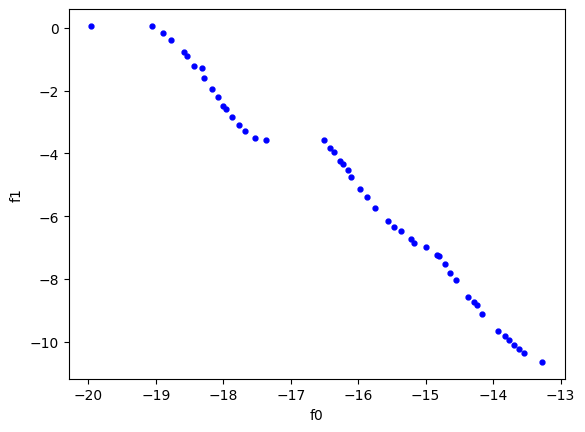


---------------------------------------------------------------------------------------


Kursawe more pop [3, 0, 'Kursawe', 200, 100]
num_vars 3
num_objs 0
problem Kursawe
pop_size 200
max_generations 100



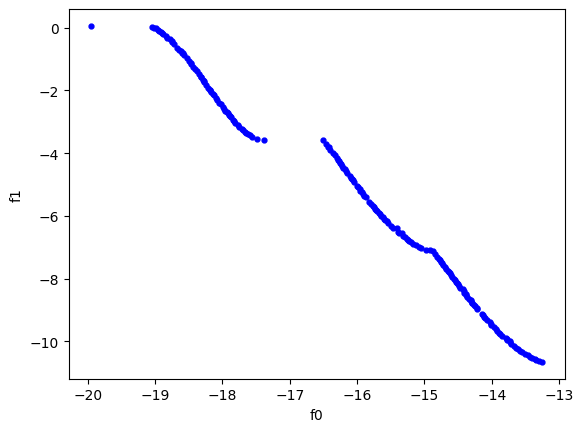


---------------------------------------------------------------------------------------


Kursawe more gen [3, 0, 'Kursawe', 50, 400]
num_vars 3
num_objs 0
problem Kursawe
pop_size 50
max_generations 400



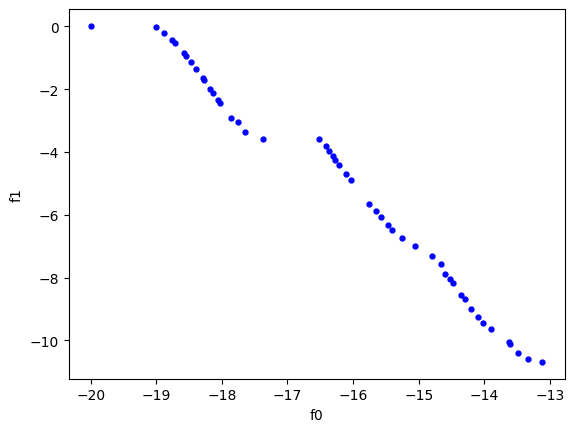


---------------------------------------------------------------------------------------


Kursawe more both [3, 0, 'Kursawe', 200, 400]
num_vars 3
num_objs 0
problem Kursawe
pop_size 200
max_generations 400



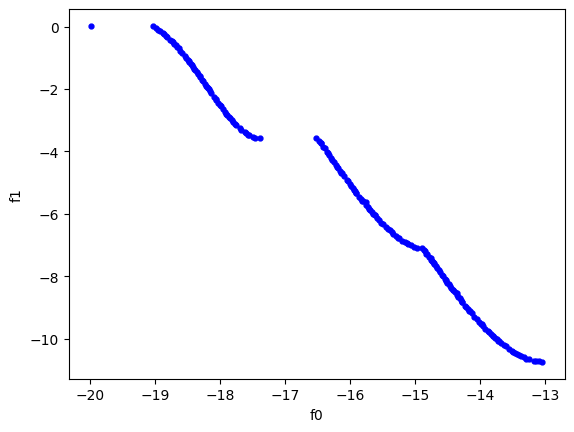


---------------------------------------------------------------------------------------


DTLZ7 basic [21, 2, 'DTLZ7', 50, 100]
num_vars 21
num_objs 2
problem DTLZ7
pop_size 50
max_generations 100



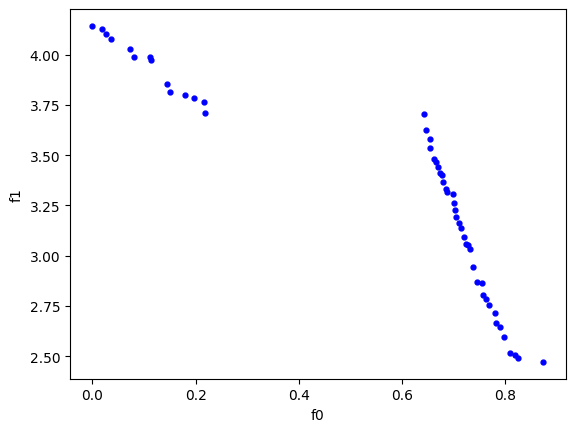


---------------------------------------------------------------------------------------


DTLZ7 more pop [21, 2, 'DTLZ7', 200, 100]
num_vars 21
num_objs 2
problem DTLZ7
pop_size 200
max_generations 100



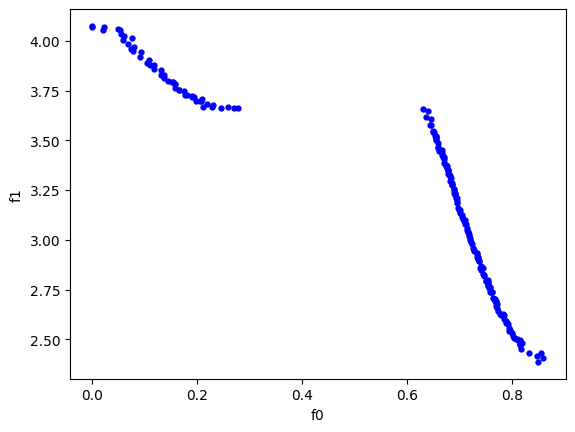


---------------------------------------------------------------------------------------


DTLZ7 more gen [21, 2, 'DTLZ7', 50, 400]
num_vars 21
num_objs 2
problem DTLZ7
pop_size 50
max_generations 400



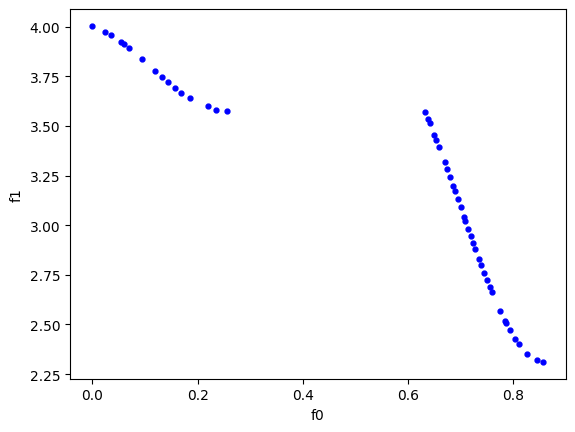


---------------------------------------------------------------------------------------


DTLZ7 more both [21, 2, 'DTLZ7', 200, 400]
num_vars 21
num_objs 2
problem DTLZ7
pop_size 200
max_generations 400



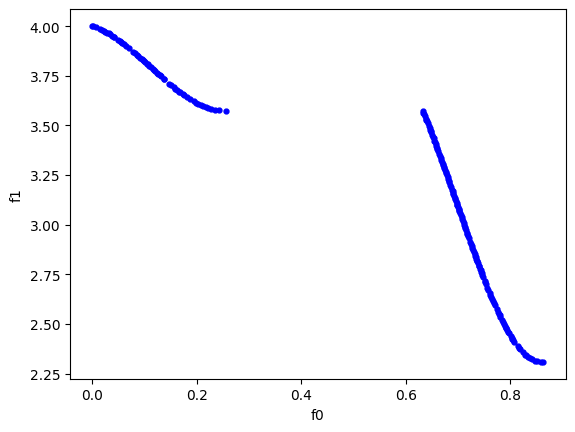


---------------------------------------------------------------------------------------


personalize basic [2, 0, 'personalize', 50, 100]
num_vars 2
num_objs 0
problem personalize
pop_size 50
max_generations 100



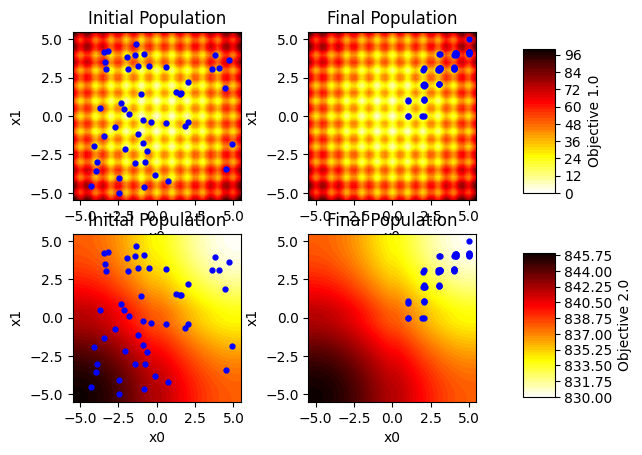

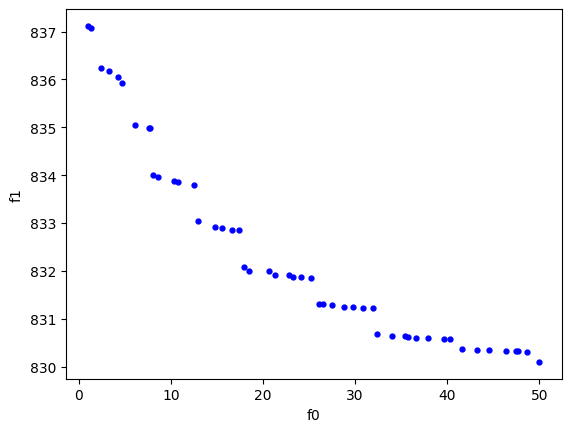


---------------------------------------------------------------------------------------


personalize more pop [2, 0, 'personalize', 200, 100]
num_vars 2
num_objs 0
problem personalize
pop_size 200
max_generations 100



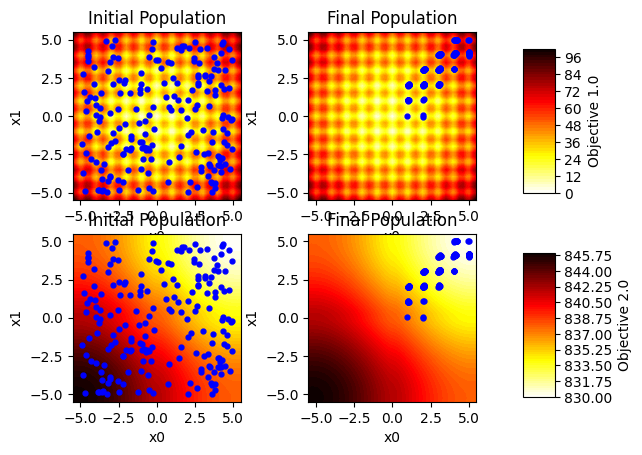

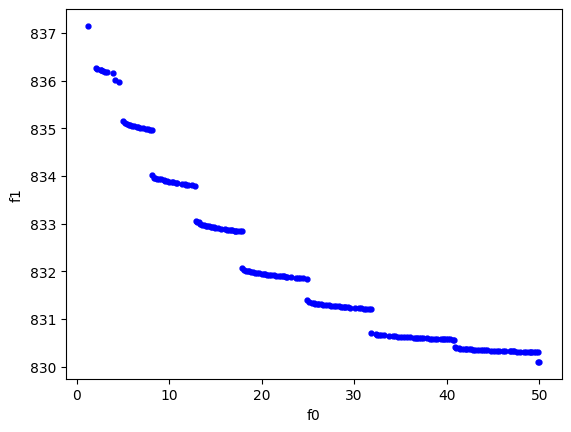


---------------------------------------------------------------------------------------


personalize more gen [2, 0, 'personalize', 50, 400]
num_vars 2
num_objs 0
problem personalize
pop_size 50
max_generations 400



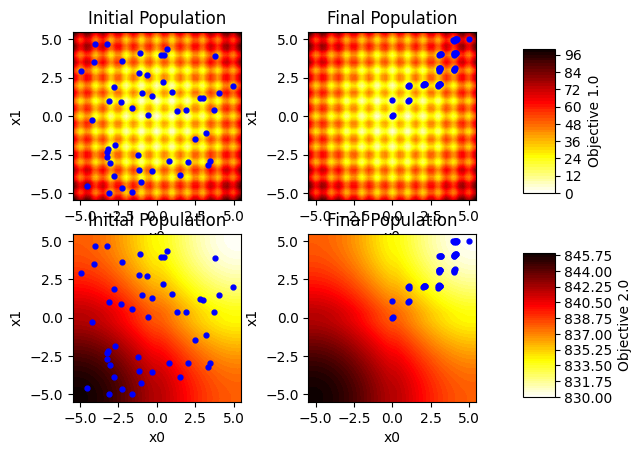

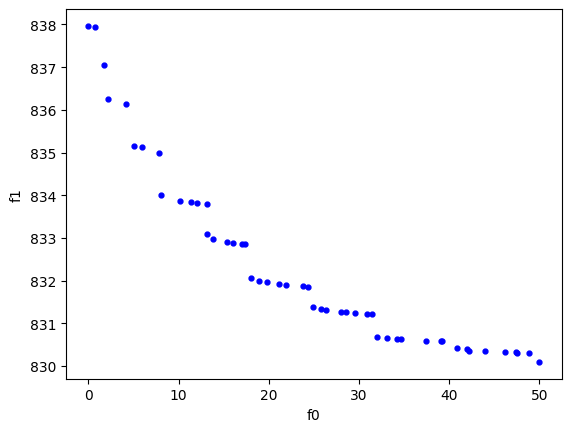


---------------------------------------------------------------------------------------


personalize more both [2, 0, 'personalize', 200, 400]
num_vars 2
num_objs 0
problem personalize
pop_size 200
max_generations 400



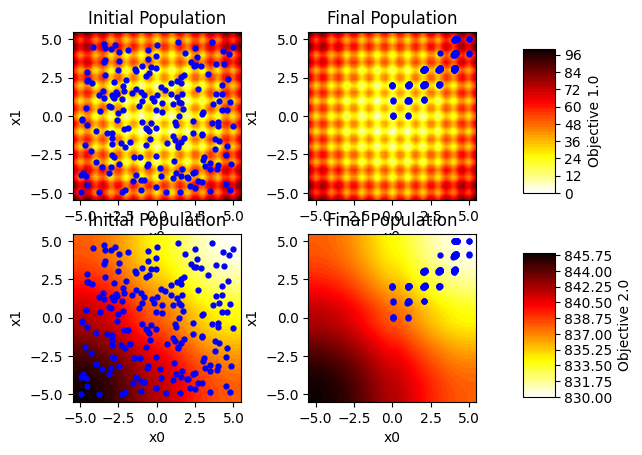

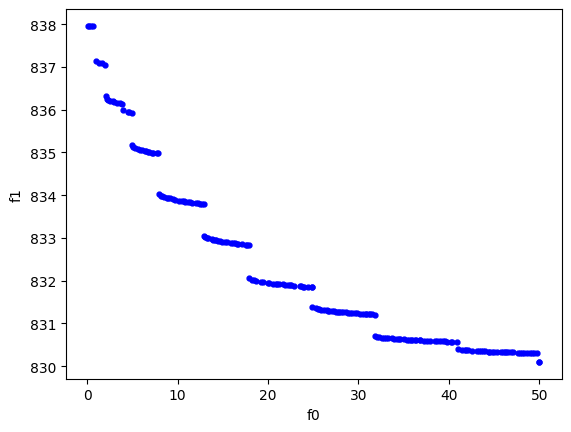

In [4]:
class MyBenchmark(benchmarks.Benchmark):
    
    def __init__(self, dimensions=2, objectives=[benchmarks.Sphere]):
        benchmarks.Benchmark.__init__(self, dimensions, len(objectives))
        self.bounder = Bounder([-5.0] * self.dimensions, [5.0] * self.dimensions)
        self.maximize = False
        self.evaluators = [cls(dimensions).evaluator for cls in objectives]
    
    def generator(self, random, args):
        return [random.uniform(-5.0, 5.0) for _ in range(self.dimensions)]
        
    def evaluator(self, candidates, args):
        fitness = [evaluator(candidates, args) for evaluator in self.evaluators]
        return list(map(Pareto, zip(*fitness)))
    
""" 
-------------------------------------------------------------------------
Edit this part to do the exercises

"""
#num vars, num objs, problem, pop size, num genrazioni
runs = {
    'Kursawe basic': [3, 0, 'Kursawe', 50 , 100],
    'Kursawe more pop': [3, 0, 'Kursawe', 200 , 100],
    'Kursawe more gen': [3, 0, 'Kursawe', 50 , 400],
    'Kursawe more both': [3, 0, 'Kursawe', 200 , 400],
    'DTLZ7 basic': [21, 2, 'DTLZ7', 50 , 100],
    'DTLZ7 more pop': [21, 2, 'DTLZ7', 200 , 100],
    'DTLZ7 more gen': [21, 2, 'DTLZ7', 50 , 400],
    'DTLZ7 more both': [21, 2, 'DTLZ7', 200 , 400],
    'personalize basic': [2, 0, 'personalize', 50 , 100],
    'personalize more pop': [2, 0, 'personalize', 200 , 100],
    'personalize more gen': [2, 0, 'personalize', 50 , 400],
    'personalize more both': [2, 0, 'personalize', 200 , 400]
}

display = True# Plot initial and final populations

for r in runs: 
    print('\n---------------------------------------------------------------------------------------\n\n')
    print(r, runs[r])
    print('num_vars', runs[r][0])
    print('num_objs', runs[r][1])
    print('problem', runs[r][2])
    print('pop_size', runs[r][3])
    print('max_generations', runs[r][4])
    num_vars = runs[r][0] # set 3 for Kursawe, set to 19+num_objs for DTLZ7
    num_objs = runs[r][1] # used only for DTLZ7

    # parameters for NSGA-2
    args = {}
    args["pop_size"] = runs[r][3]
    args["max_generations"] = runs[r][4]

    if runs[r][2] == 'Kursawe':
        problem = benchmarks.Kursawe(num_vars)
    elif runs[r][2] == 'DTLZ7':
        problem = benchmarks.DTLZ7(num_vars,num_objs)
    else:
        problem = MyBenchmark(num_vars, [benchmarks.Rastrigin, benchmarks.Schwefel] )



    #problem = MyBenchmark(num_vars, [benchmarks.Rastrigin, benchmarks.Schwefel] )
    #problem = MyBenchmark(num_vars, [benchmarks.Sphere, benchmarks.Rastrigin, benchmarks.Schwefel] )

    """
    -------------------------------------------------------------------------
    """

    args["fig_title"] = 'NSGA-2'
        
    seed = None
    rng = NumpyRandomWrapper(seed)

    final_pop, final_pop_fitnesses = multi_objective.run_nsga2(rng, problem,
                                    display=display, num_vars=num_vars,
                                    **args)


    #print("Final Population\n", final_pop)
    print()
    #print("Final Population Fitnesses\n", final_pop_fitnesses)
    ioff()
    show()

## Exercise 3

While benchmark problems can be interesting to investigate, multi-objective genetic algorithms can be (and are) used for many real-world problems as well.

In this exercise you will investigate optimizing the parameters of a multiple-disk clutch brake. This example comes from$^{[1]}$.

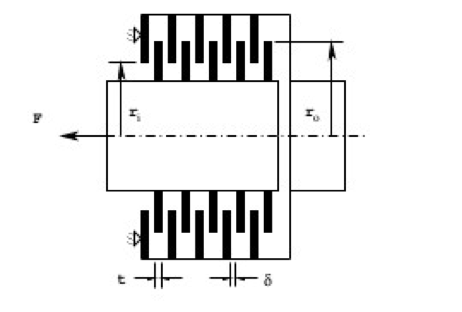


Two-conflicting objectives are considered: (i) minimization of mass ($f_1$ in kg) of the brake system and (ii) minimization of stopping time ($f_2$ in s).

There are five decision variables: $x = (r_i , r_o , t, F, Z)$, where $r_i$ in [60, 80] (in steps of one) is the inner radius in mm, $r_o$ in [90, 110] (in steps of one) is the outer radius in mm, $t$ in [1.5, 3] (in steps of 0.5) is the thickness of discs in mm, $F$ in [600, 1000] (in steps of 10) is the actuating force in N and $Z$ in [2, 9] (in steps of one) is the number of friction surfaces (or discs). 

This problem has been implemented for you in `disk_clutch_brake.py`. You may want to look through that code to see how it is possible to deal with a problem with fixed values for the decision variables such as this one.

This will attempt to optimize the five variables to minimize the two objectives.
- Is the algorithm able to find reasonable solutions to this problem? Use what you have learned about population sizes and number of generations to improve the quality of the found solutions. (NOTE: Do not make them too big or you will have to wait a long time to obtain results!)

1. Popolazione di Base (10 individui, 10 generazioni)
Final Population: I valori delle variabili decisionali variano, ma i parametri più comuni includono raggio interno e raggio esterno vicini a 75-80 mm, con forza di attuazione di 1000 N, spessore di 1.5 mm e un numero variabile di superfici di attrito.
Final Fitnesses: La fitness delle soluzioni varia, con un compromesso evidente tra massa e tempo di frenata. Ad esempio, una soluzione ha una massa di 1.366 kg e un tempo di frenata di 3.57 s, mentre un'altra ha una massa inferiore (0.511 kg) ma un tempo di frenata significativamente maggiore (9.40 s).
2. Aumento della Popolazione (50 individui, 10 generazioni)
Final Population: L'aumento della popolazione ha permesso di esplorare un insieme più diversificato di soluzioni. Notiamo un focus su valori di raggio interno ed esterno costanti a 76-80 mm e la forza di attuazione rimane vicina ai 1000 N.
Final Fitnesses: L'aumento della popolazione porta a un miglior compromesso tra massa e tempo di frenata. Ad esempio, una soluzione ha una massa di 0.256 kg e un tempo di frenata di 16.70 s, mentre altre soluzioni mantengono masse ridotte con tempi di frenata tra 5-6 s, mostrando una maggiore varietà di compromessi rispetto alla popolazione più piccola.
3. Aumento delle Generazioni (10 individui, 50 generazioni)
Final Population: Qui vediamo soluzioni con raggio interno costante di 80 mm, raggio esterno tra 90-91 mm, forza di attuazione di 1000 N e spessore sempre di 1.5 mm. Queste configurazioni sono ricorrenti.
Final Fitnesses: Anche se la popolazione rimane piccola, l'aumento delle generazioni migliora la qualità delle soluzioni. Alcune soluzioni raggiungono una buona massa (0.312 kg) con tempi di frenata accettabili (8.31 s), mentre altre soluzioni ottimizzano maggiormente il tempo, con fitness di circa 3.45 s ma con una massa più alta (1.55 kg).
4. Aumento di Popolazione e Generazioni (50 individui, 50 generazioni)
Final Population: Aumentando sia la popolazione che il numero di generazioni, vediamo una convergenza verso soluzioni con raggio interno ed esterno massimi, forza di attuazione di 1000 N, spessore di 1.5 mm, e un numero di superfici di attrito tra 2 e 9.
Final Fitnesses: Qui, le soluzioni sono più raffinate. Ad esempio, una soluzione ha una massa di 0.187 kg con un tempo di frenata di 16.34 s, mentre altre soluzioni ottimizzano il tempo (tra 3.37 s e 3.64 s) mantenendo masse accettabili tra 0.895 kg e 1.85 kg. Questo mostra un buon equilibrio tra i due obiettivi.

Now that you are solving a *'real'* problem it is useful to examine the results. Inspect the final Pareto-front from a successful optimization run.

- Do you see any patterns in the Pareto-optimal solutions that may help you in designing a well-performing disk-brake in the future?

Tendenza a massimizzare r_i e r_o: Le soluzioni tendono a massimizzare il raggio interno ed esterno (80 mm e 90-107 mm rispettivamente), probabilmente per ridurre il tempo di frenata e distribuire meglio la forza di frenata.
Forza di attuazione costante (1000 N): In tutte le soluzioni ottimali, la forza di attuazione è quasi sempre 1000 N, suggerendo che una maggiore forza permette di migliorare il tempo di frenata senza penalizzare troppo la massa.
Spessore minimo dei dischi (1.5 mm): Lo spessore dei dischi è sempre al limite inferiore (1.5 mm), il che potrebbe indicare che un minor spessore riduce la massa senza impattare eccessivamente sul tempo di frenata.
Numero di superfici di attrito variabile: Il numero di dischi varia da 2 a 9, suggerendo che un maggiore numero di superfici può migliorare il tempo di frenata, ma ad un costo di massa.

The final population and fitness values are saved in `exercise_3.csv` in the form \{$r_i$, $r_o$, $t$, $F$, $Z$, $mass$, $time$\}, one line for each solution in the Pareto front. You may want to try plotting these data in different ways to gain further insights. This process is what Deb has dubbed *'innovization'*.

----

[1]:
Deb, K., and Srinivasan, A. Innovization: Innovating design principles through optimization. Proceedings of the 8th annual conference on Genetic and evolutionary computation. ACM, 2006.

In [12]:
from functools import reduce
from inspyred.ec import variators
from utils.utils_04.disk_clutch_brake import DiskClutchBrake, disk_clutch_brake_mutation

basic [10, 10]
Final Population
 [[ 71.   90.    1.5 900.    3. ]
 [ 69.  103.    2.  950.    9. ]
 [ 78.   93.    1.5 970.    6. ]
 [ 72.   91.    1.5 930.    3. ]
 [ 79.  101.    1.5 910.    9. ]
 [ 78.   90.    1.5 960.    8. ]
 [ 80.  101.    1.5 940.    8. ]
 [ 76.   95.    1.5 970.    8. ]
 [ 78.   91.    1.5 910.    5. ]
 [ 71.   90.    1.5 940.    4. ]]

Final Population Fitnesses
 [[ 0.44975417 12.83564816]
 [ 2.86603728  3.83523802]
 [ 0.65996536  5.70384496]
 [ 0.45534118 12.28502933]
 [ 1.45556271  3.85633057]
 [ 0.66691237  4.41539033]
 [ 1.25740769  4.17595135]
 [ 1.07480074  4.28406551]
 [ 0.48452595  7.36080753]
 [ 0.56219272  9.2871052 ]]


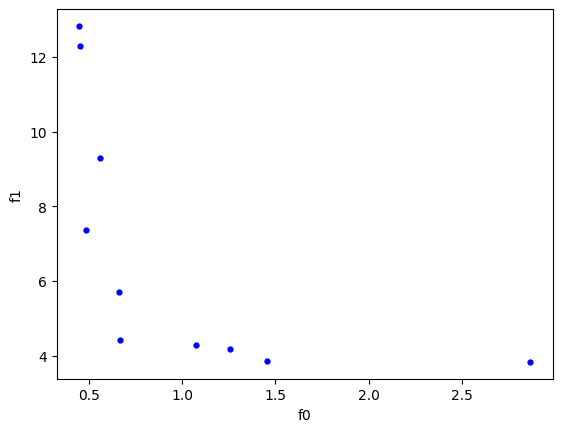

more pop [50, 10]
Final Population
 [[ 78.   97.    2.  980.    9. ]
 [ 76.   91.    1.5 960.    3. ]
 [ 80.   91.    1.5 840.    6. ]
 [ 80.   92.    1.5 850.    6. ]
 [ 80.   94.    1.5 810.    3. ]
 [ 80.   91.    1.5 870.    7. ]
 [ 74.   91.    1.5 940.    8. ]
 [ 78.   98.    2.  980.    9. ]
 [ 78.   96.    1.5 880.    2. ]
 [ 80.   95.    1.5 990.    7. ]
 [ 80.   93.    1.5 950.    7. ]
 [ 80.   90.    1.5 810.    5. ]
 [ 78.   95.    1.5 850.    2. ]
 [ 80.   95.    1.5 980.    9. ]
 [ 80.   91.    1.5 860.    5. ]
 [ 80.   95.    1.5 870.    9. ]
 [ 79.   95.    1.5 870.    8. ]
 [ 77.   95.    1.5 850.    2. ]
 [ 75.  100.    1.5 970.    9. ]
 [ 79.   94.    1.5 900.    4. ]
 [ 79.   93.    1.5 820.    4. ]
 [ 77.   96.    1.5 900.    9. ]
 [ 80.   93.    1.5 940.    7. ]
 [ 77.   98.    1.5 970.    9. ]
 [ 78.   96.    1.5 850.    2. ]
 [ 80.   92.    1.5 810.    7. ]
 [ 77.   93.    1.5 890.    3. ]
 [ 79.   91.    1.5 830.    6. ]
 [ 75.   99.    2.  980.    9. ]
 [ 79. 

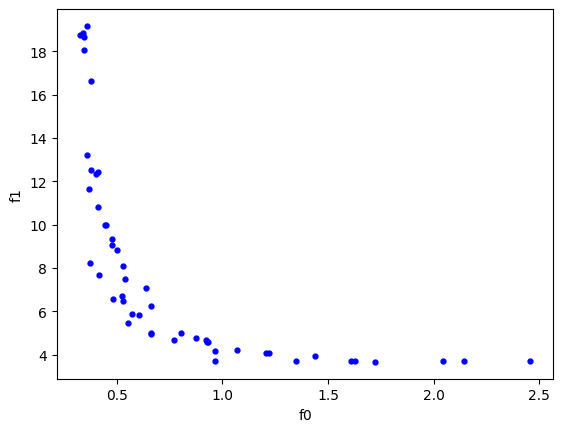

more gen [10, 50]
Final Population
 [[  68.   108.     1.5 1000.     9. ]
 [  70.    90.     1.5 1000.     2. ]
 [  70.    90.     1.5 1000.     3. ]
 [  69.    93.     1.5  990.     2. ]
 [  75.    90.     1.5 1000.     5. ]
 [  70.    91.     1.5 1000.     7. ]
 [  74.    90.     1.5  990.     4. ]
 [  74.    91.     1.5 1000.     4. ]
 [  69.    95.     1.5 1000.     8. ]
 [  68.    94.     1.5  980.     9. ]]

Final Population Fitnesses
 [[ 2.58766704  3.54813238]
 [ 0.35286369 17.2614981 ]
 [ 0.47048492 11.64729329]
 [ 0.42872938 17.18732304]
 [ 0.54583602  6.86259227]
 [ 0.99419344  5.02848809]
 [ 0.48224704  8.68060633]
 [ 0.51551179  8.54113091]
 [ 1.41057259  4.3143233 ]
 [ 1.54818943  3.9636324 ]]


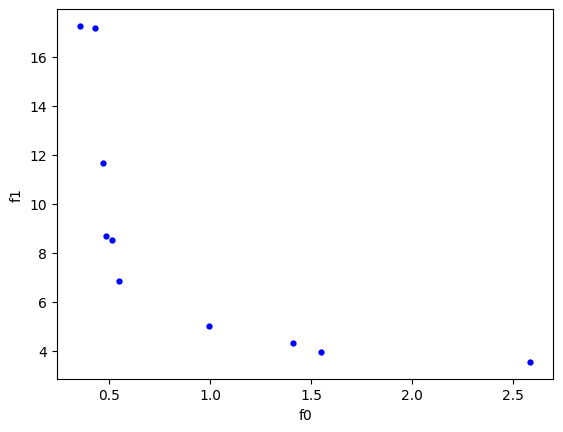

more both [50, 50]
Final Population
 [[  80.    90.     1.5 1000.     3. ]
 [  80.   108.     1.5 1000.     9. ]
 [  80.    92.     1.5 1000.     3. ]
 [  80.    90.     1.5 1000.     4. ]
 [  80.    90.     1.5 1000.     5. ]
 [  80.    91.     1.5 1000.     4. ]
 [  80.    91.     1.5 1000.     5. ]
 [  80.    90.     1.5 1000.     6. ]
 [  80.    90.     1.5 1000.     7. ]
 [  80.    91.     1.5 1000.     6. ]
 [  80.    90.     1.5 1000.     8. ]
 [  80.    91.     1.5 1000.     7. ]
 [  80.    90.     1.5 1000.     9. ]
 [  80.    91.     1.5 1000.     8. ]
 [  80.   107.     1.5 1000.     9. ]
 [  80.   106.     1.5 1000.     9. ]
 [  80.   105.     1.5 1000.     9. ]
 [  80.   101.     1.5 1000.     9. ]
 [  80.    98.     1.5 1000.     9. ]
 [  80.    97.     1.5 1000.     9. ]
 [  80.    95.     1.5 1000.     9. ]
 [  80.    94.     1.5 1000.     9. ]
 [  80.    92.     1.5 1000.     9. ]
 [  80.    91.     1.5 1000.     9. ]
 [  80.   104.     1.5 1000.     9. ]
 [  80.   103

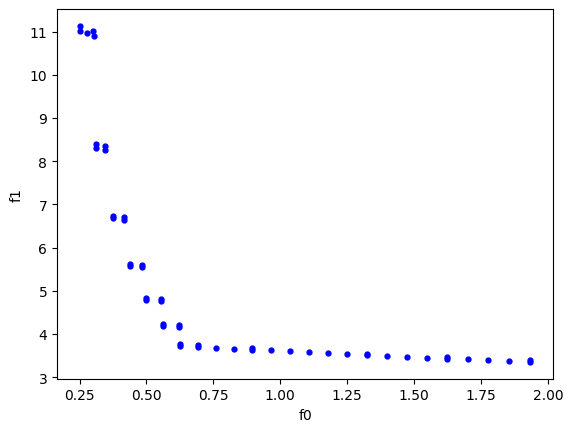

In [13]:
display = True
#pop, gen
runs = {
    'basic': [10, 10],
    'more pop': [50, 10],
    'more gen': [10, 50],
    'more both': [50, 50]
}

for r in runs:
    print(r, runs[r]) 
    # parameters for NSGA-2
    args = {}
    args["pop_size"] = runs[r][0]
    args["max_generations"] = runs[r][1]
    constrained = False

    """
    -------------------------------------------------------------------------
    """

    problem = DiskClutchBrake(constrained)
    if constrained :
        args["constraint_function"] = problem.constraint_function
    args["objective_1"] = "Brake Mass (kg)"
    args["objective_2"] = "Stopping Time (s)"

    args["variator"] = [variators.blend_crossover,disk_clutch_brake_mutation]

    args["fig_title"] = 'NSGA-2'

    seed = None
    rng = NumpyRandomWrapper(seed)

    final_pop, final_pop_fitnesses = multi_objective.run_nsga2(rng, problem, display=display, 
                                        num_vars=5, **args)


    output = open("exercise_3.csv", "w")
    for individual, fitness in zip(final_pop, final_pop_fitnesses) :
        output.write(reduce(lambda x,y : str(x) + "," + str(y), 
                            individual))
        output.write(",")
        output.write(reduce(lambda x,y : str(x) + "," + str(y), 
                            fitness))
        output.write("\n")
    output.close()
    print("Final Population\n", final_pop)
    print()
    print("Final Population Fitnesses\n", final_pop_fitnesses)
    ioff()
    show()

## Instructions and questions

Concisely note down your observations from the previous exercises (follow the bullet points) and think about the following questions. 

- When do you think it is appropriate to use a multi-objective evolutionary algorithm vs. combining multiple objectives into a single fitness function?

MOEAs are suitable when trade-offs between conflicting objectives are important, and you need a range of solutions to analyze.
A single-objective fitness function is appropriate when there is a clear priority between objectives, or when a compromise can be predefined.

- What can the results of a multi-objective algorithm teach us about exploring the design spaces of engineering problems?

MOEAs reveal the complex relationships between design variables and objectives, helping to visualize trade-offs and optimize designs under conflicting constraints.
They facilitate a deeper understanding of multiple feasible solutions, highlighting how changes in one parameter affect the others.

- In biological evolution it is possible to think of many phenotypic traits that contribute to the ultimate fitness of an organism (try to enumerate some of these). What (if any) relevance do multi-objective evolutionary algorithms have to biology?

In biology, phenotypic traits like size, strength, and speed contribute to fitness. MOEAs reflect biological evolution by simulating how organisms balance multiple traits to maximize survival.
MOEAs mirror natural selection, where multiple factors (e.g., reproduction rate, longevity, resource efficiency) are optimized simultaneously, offering insights into evolutionary processes.